In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## REVIEW: Visualizing Categorical Distribution ##

Here are some examples of categorical variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.

- The individuals are professional basketball players, and the variable is the player’s team.

- The individuals are years, and the variable is the genre of the highest grossing movie of the year.

- The individuals are survey respondents, and the variable is the response they choose from among “Not at all satisfied,” “Somewhat satisfied,” and “Very satisfied.”

In [3]:
vgsales = Table.read_table('vgsales.csv')
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
# New years_since variable
years_since = 2024 - vgsales.column('Year')

# Add Age column to table
vgsales = vgsales.with_column('Years Since Release', years_since)
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,18
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,16
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33,15
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,28
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,35
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,18
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,18
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62,15
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,40


**Question:** How many different genres of games are there? 

`Hint:` Construct a frequency(count) distribution for the appropriate categorical variable in the data set. This is considered a summary of the categorical variable.

In [5]:
genre_distribution = vgsales.group('Genre')
genre_distribution

Genre,count
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310
Simulation,867


In [6]:
sum(genre_distribution.column('count'))

16598

In [7]:
# Track all games from the publisher - Nintendo, and sort by global sales.
nintendo = vgsales.where('Publisher', 'Nintendo').sort('Global_Sales', descending=True)
nintendo

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,18
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,16
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33,15
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,28
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,35
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,18
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,18
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62,15
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,40


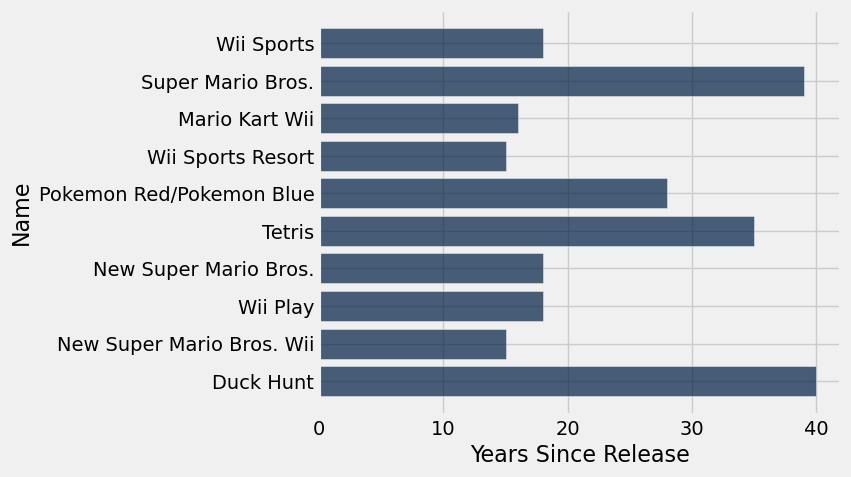

In [8]:
# Select Nintendo, sort by global sales, and make new table with 10 largest global sales
top10_nintendo = nintendo.take(np.arange(10))

# Barplot of name/title of the games by Age.
top10_nintendo.barh('Name', 'Years Since Release')

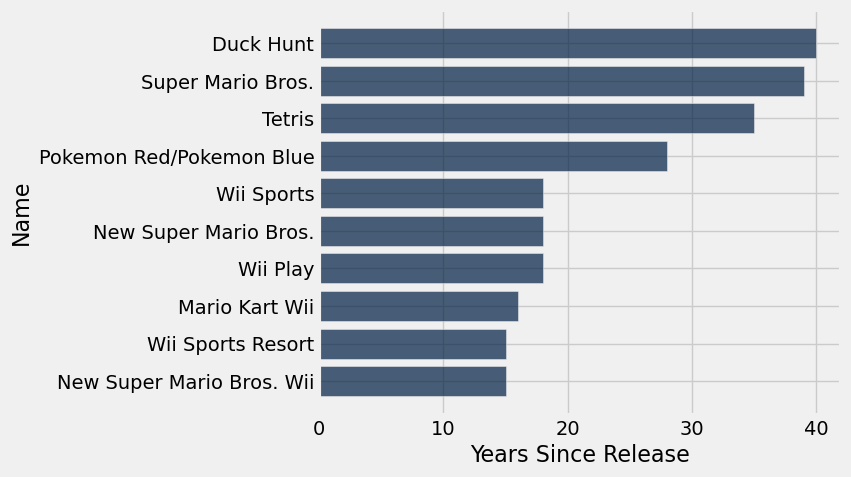

In [9]:
# SORTED Barplot of name/title of the games by Age.
top10_nintendo.sort('Years Since Release', descending = True).barh('Name', 'Years Since Release')

## NEW CONTENT ##

## Summarizing and Visualizing Numerical Distribution - Binning and Histogram ##

In [10]:
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,18
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,39
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,16
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33,15
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,28
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,35
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,18
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,18
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62,15
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,40


## Binning ##

In this short exercise, we want to produce a 'binned' or grouped frequency distribution of the continuous numerical variable `years_since`.

In [11]:
# Find the range of values of the variable.
min(years_since), max(years_since)

(4.0, 44.0)

In [12]:
# Sometimes we can set an arbitrary set of lower end points(bin lower limit) for each bin/class of values
my_bins = make_array(0, 5, 10, 15, 20, 30, 45)

## Using the `bin` function ##

**Question:** Provide a 'binned' or grouped frequency distribution of the continuous numerical variable `years_since`.

In [64]:
binned_data = vgsales.bin('Years Since Release', bins = my_bins)
binned_data

bin,Years Since Release count
0,1
5,961
10,4183
15,6010
20,4686
30,486
45,0


In [65]:
sum(binned_data.column('Years Since Release count'))

16327

**Question:** Why does the sum of the `Years Since Release count` column not equal the total number of rows in the data set?

In [15]:
# The reason can be found by exploring the values of the variable "Years Since Release count" further.

vgsales.sort('Years Since Release', descending=True)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
180,Madden NFL 2004,PS2,nan,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,nan
378,FIFA Soccer 2004,PS2,nan,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,nan
432,LEGO Batman: The Videogame,Wii,nan,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29,3.17,nan
471,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,nan,1.57,1.02,0,0.41,3,nan
608,Space Invaders,2600,nan,Shooter,Atari,2.36,0.14,0,0.03,2.53,nan
625,Rock Band,X360,nan,Misc,Electronic Arts,1.93,0.34,0,0.21,2.48,nan
650,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,Konami Digital Entertainment,2.15,0.18,0,0.07,2.39,nan
653,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,LucasArts,1.54,0.63,0,0.22,2.39,nan
713,Call of Duty 3,Wii,nan,Shooter,Activision,1.19,0.84,0,0.23,2.26,nan
784,Rock Band,Wii,nan,Misc,MTV Games,1.35,0.56,0,0.2,2.11,nan


In [16]:
# Let's try another custom binning with regular bin-widths
vgsales.bin('Years Since Release', bins = np.arange(0, 50, 5))

bin,Years Since Release count
0,1
5,961
10,4183
15,6010
20,3198
25,1488
30,281
35,83
40,122
45,0


In [17]:
vgsales.bin('Years Since Release', bins = np.arange(0, 46, 5))

bin,Years Since Release count
0,1
5,961
10,4183
15,6010
20,3198
25,1488
30,281
35,83
40,122
45,0


In [18]:
vgsales.where('Years Since Release', are.above_or_equal_to(40)).num_rows

122

## Histograms ##

In this short exercise, we want to produce a histogram/visualization of the continuous numerical variable `years_since`.

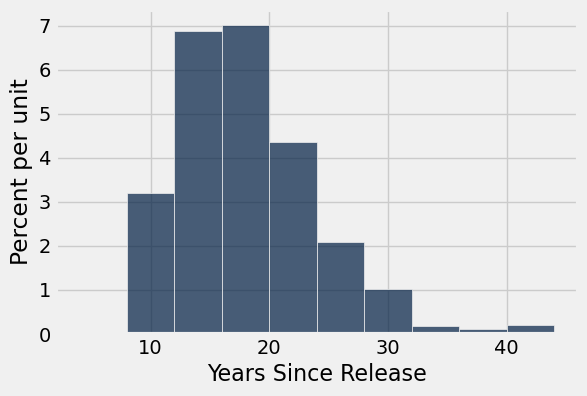

In [51]:
vgsales.hist('Years Since Release')

## Using Custom/User-defined bins in a histogram ##

In [66]:
my_bins

array([ 0,  5, 10, 15, 20, 30, 45], dtype=int64)

In [67]:
# A binned/grouped frequency distribution

binned_data

bin,Years Since Release count
0,1
5,961
10,4183
15,6010
20,4686
30,486
45,0


**Quesion:** Based on the grouped frequency table above, how many games have been released for at least 15 years but less than 20 years?

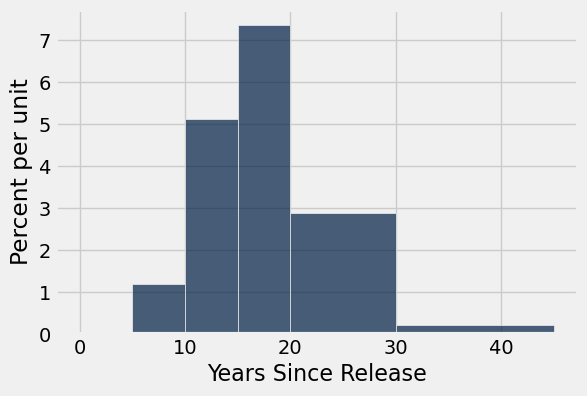

In [68]:
# Let's make a histogram based on the custom bins defined.

vgsales.hist('Years Since Release', bins = my_bins)

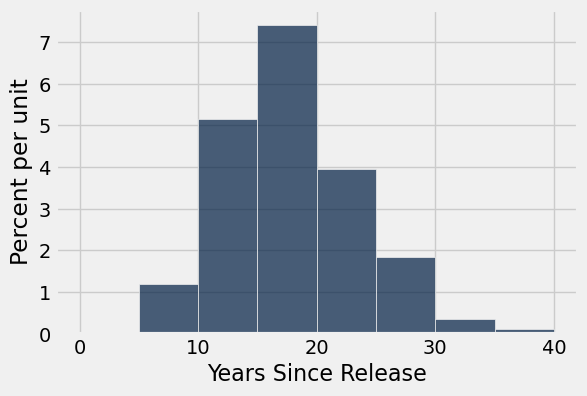

In [69]:
# Let's try equally spaced bins instead.
vgsales.hist('Years Since Release', bins = np.arange(0, 45, 5))

In [56]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*(binned_data.column('Years Since Release count')/sum(binned_data.column('Years Since Release count'))))

In [57]:
binned_data

bin,Years Since Release count,Percent
0,1,0.00612482
5,961,5.88596
10,4183,25.6201
15,6010,36.8102
20,4686,28.7009
30,486,2.97666
45,0,0


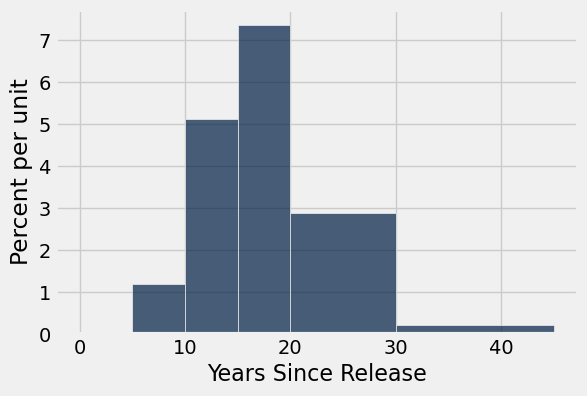

In [70]:
vgsales.hist('Years Since Release', bins = my_bins)

In [58]:
sum(binned_data.column('Percent'))

100.0

## Calculating the height of a bar in a histogram ##

**Question:** What is the height of the [20, 30) bin? 

In [59]:
# Step 1: What is the % of games in the [20, 30) bin?
percent = binned_data.where('bin', 20).column('Percent').item(0)
percent

28.700924848410608

In [60]:
# Step 2: Calculate the width of the 20-30 bin
width = 30 - 20

In [61]:
# Step 3: Area of rectangle = height * width
#         ---------> height = percent / width
height = percent / width
height

2.8700924848410607

**Question:** Can you explain the relevance of the number above in the histogram(based on the bins = `my_bins`). Output the histogram below to connect the dots.

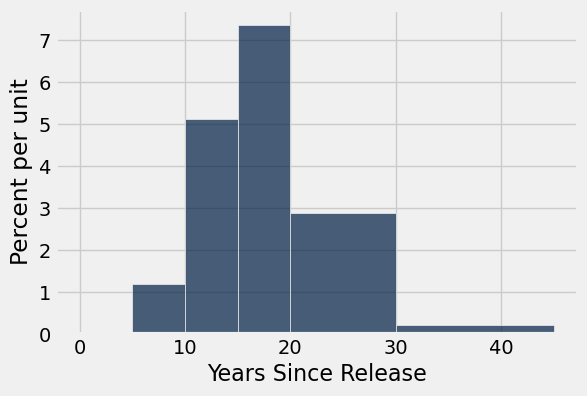

In [62]:
vgsales.hist('Years Since Release', bins = my_bins)

### What are the heights of the rest of the bins?

In [63]:
binned_data

bin,Years Since Release count,Percent
0,1,0.00612482
5,961,5.88596
10,4183,25.6201
15,6010,36.8102
20,4686,28.7009
30,486,2.97666
45,0,0


**Step 1:** Find the lower bounds of each of the non-empty bins.

In [32]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

**Step 2:** Find the widths of each of the non-empty bins.

In [49]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)
bin_lefts

bin,Years Since Release count,Percent,Width,Height
0,1,0.00612482,5,0.00122496
5,961,5.88596,5,1.17719
10,4183,25.6201,5,5.12403
15,6010,36.8102,5,7.36204
20,4686,28.7009,10,2.87009
30,486,2.97666,15,0.198444


**Step 3:** Recall that area = height * width. It follows that:

- height of each bar = area of each bar(percent) divided by width of the bar.

In [34]:
# Get the bin heights

bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [35]:
bin_lefts

bin,Years Since Release count,Percent,Width,Height
0,1,0.00612482,5,0.00122496
5,961,5.88596,5,1.17719
10,4183,25.6201,5,5.12403
15,6010,36.8102,5,7.36204
20,4686,28.7009,10,2.87009
30,486,2.97666,15,0.198444


- **Let us compare the entries of the table above to the histogram below**

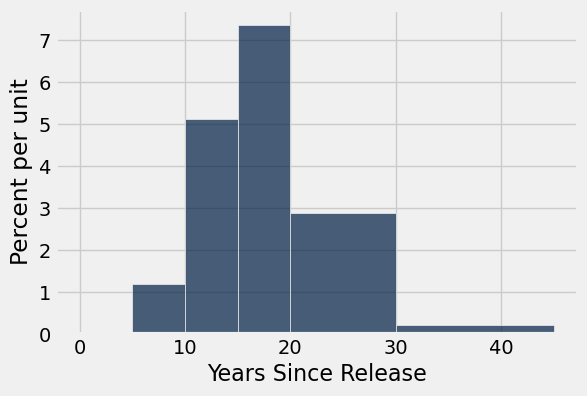

In [36]:
vgsales.hist('Years Since Release', bins = my_bins)